# Before your start:

    Read the README.md file
    Comment as much as you can and use the resources (README.md file)
    Happy learning!

*Notes:* 

- Solve the questions with python.

- Round the final answer to three decimal places.

## Bernoulli's Distribution

In a basket containing 100 fruits, there are 60 apples and 40 oranges. 

A fruit is picked randomly from the basket. 

1. **What is the probability that the fruit is apple?**
1. **What is the probability that it is an orange?**

In [1]:
from scipy.stats import binom
from math import factorial
from math import e
from scipy.stats import poisson

In [2]:
"""
Calculate:
p = probability that the fruit is an apple 
q = probability that the fruit is an orange
"""

# your code here
p=(60/100)
q=(40/100)

In [3]:
print ("p:",p, "q:",q )

p: 0.6 q: 0.4


Now we take a random sample of 20 fruits from the basket. After each fruit is taken, a new fruit of the same type is placed in the basket. Therefore, every time we are taking 1 fruit from the same 100 fruits (sample with replacements). 

1. **What is the probability that the first 5 fruits are all apples?**

1. **What is the probability that the first 5 fruits are all apples and the next 15 fruits are all oranges?**

You can include the `p` and `q` probabilities you previous calculated in your solution.

In [4]:
# your code here
#1: Draw 20 fruits with replacement, prob first five are apples= 5 draws, 5 apples
#prob_apple=p=(60/100)=0.6
#there is only one way to do it, so the combinatorial module is 1
#there are no orange outcomes contemplated, so the q module is one.

#(p**5) * (q**0) * C(5_over_5)  =  (p**5)  *1*  (5!/(0!*5!))=(p**5)  *1* 1

p**5

0.07775999999999998

In [5]:
#2. What is the probability that the first 5 fruits are all apples and the next 15 fruits are all oranges?
#prob of 5 apples and 15 oranges, indepentdent events
#there is only one way to do this, the first 5 are apples, and the last 15 are oranges 

#(p**5) * (q**0) * C(5_over_5)=(p**5)  *1*  (5!/(0!*5!))=(p**5)  *1* 1
# multuplied, as these are indepentdent events, by: 
#(p**0) * (q**15) * C(15_over_15)  = (p**5)  *1*  (15!/(0!*15!))=(p**5)  *1* 1

(p**5)*(q**15)

8.349416423424006e-08

## Binomial Distribution

Similar to the above problem, this time again we randomly sample 20 fruits, but this time we don't add any more fruits after selecting a fruit (sample without replacements).

**What is the probability that this time the sample contains 5 apples and 15 oranges?**

Please note that this time the order of the fruits being picked does not matter.

In [17]:
# your code here
#prob 5 apples + 15 oranges:

twenty_over_five=(factorial(20))/((factorial(20-5))*(factorial(5)))
#there are 15505  possible combinations to get exactly 5 oranges in 20 draws
twenty_over_five

15504.0

In [18]:
twenty_over_five*(p**5)*(q**15)

0.0012944935222876579

In [26]:
four_over_two=(factorial(4))/((factorial(4-2))*(factorial(2)))
four_over_two

6.0

In [19]:
#with scipy:
#binom.pmf(k, n, p)
#n total, k: picked, p: prob success:
binom.pmf(5, 20, 0.6)

0.0012944935222876511

In [20]:
#binom.pmf(k, n, p, loc) is identically equivalent to binom.pmf(k - loc, n, p).

In [10]:
binom.pmf(5,20,0.6)*100

0.1294493522287651

In the lesson we also discussed CDF (cumulative distribution function). In Python, this can be calculated with the ```binom()``` function. Read the documentation in order to learn how to use it.


In the context of the above problem, **what is the probability that from the 20 selected fruits, less than 5 fruits picked are apples?**

Write the formula and calculate the probability below.

In [11]:
# your code here
binom.cdf(4, 20, 0.6)


0.0003170311211686301

***Optional self learning: We will see matplotlib tomorrow.***

**Plot the PDF (probability distributiom function) for the above binomial distribution.**

*Hint: The range of x in a binomial distribution is from `0` to `n`.*

In [12]:
# your code here
# Please label the axes and give a title to the plot 

## Poisson Distribution

In this challenge you are required to use the Math library in Python to solve the problems.

In the UEFA champions league tournament, the average number of goals scored in a match is 2.3. 

**What is the probability that the number of goals scored in a match is 5?**

*Hint: Use the exp() in the math library*

And to calculate the factorial, you can use the following code:

```python
import math
math.factorial(n) # n is the number you want to find the factorial of
```

In [13]:
#lambda is 2.5 and k is 5

poisson.pmf(5,2.3)

0.053775025581946814

In [14]:
# your code here 

(2.3**5)*(e**-2.3)/factorial(5)

0.05377502558194681

***Optional self learning: We will see matplotlib tomorrow.***


**Draw a poisson probability distribution plot for the number of goals to be between 0 to 10.**

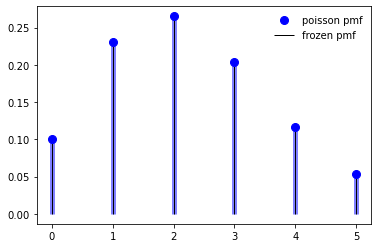

In [15]:
# your code here
# Please label the axes and give a title to the plot 
import numpy as np
from scipy.stats import poisson

import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1)

#Calculate a few first moments:


mu = 2.3

mean, var, skew, kurt = poisson.stats(mu, moments='mvsk')

#Display the probability mass function (pmf):


x = np.arange(poisson.ppf(0.01, mu),

              poisson.ppf(0.99, mu))

ax.plot(x, poisson.pmf(x, mu), 'bo', ms=8, label='poisson pmf')

ax.vlines(x, 0, poisson.pmf(x, mu), colors='b', lw=5, alpha=0.5)

#Alternatively, the distribution object can be called (as a function) to fix the shape and location. This returns a “frozen” RV object holding the given parameters fixed.

#Freeze the distribution and display the frozen pmf:


rv = poisson(mu)

ax.vlines(x, 0, rv.pmf(x), colors='k', linestyles='-', lw=1,

        label='frozen pmf')

ax.legend(loc='best', frameon=False)

plt.show()